In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
os.chdir('D:\\top mentor assignment\\Batch 98 Day 53\Projects\\Project -4 HR Department\\')

In [3]:
os.getcwd()

'D:\\top mentor assignment\\Batch 98 Day 53\\Projects\\Project -4 HR Department'

In [4]:
df= pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df[['Attrition','OverTime', 'Over18' ]]

,Attrition,OverTime,Over18
0,Yes,Yes,Y
1,No,No,Y
2,Yes,Yes,Y
3,No,Yes,Y
4,No,No,Y
...,...,...,...
1465,No,No,Y
1466,No,No,Y
1467,No,Yes,Y
1468,No,No,Y


In [9]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [12]:
df[['Attrition','OverTime', 'Over18' ]]

,Attrition,OverTime,Over18
0,1,1,1
1,0,0,1
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
1465,0,0,1
1466,0,0,1
1467,0,1,1
1468,0,0,1


In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

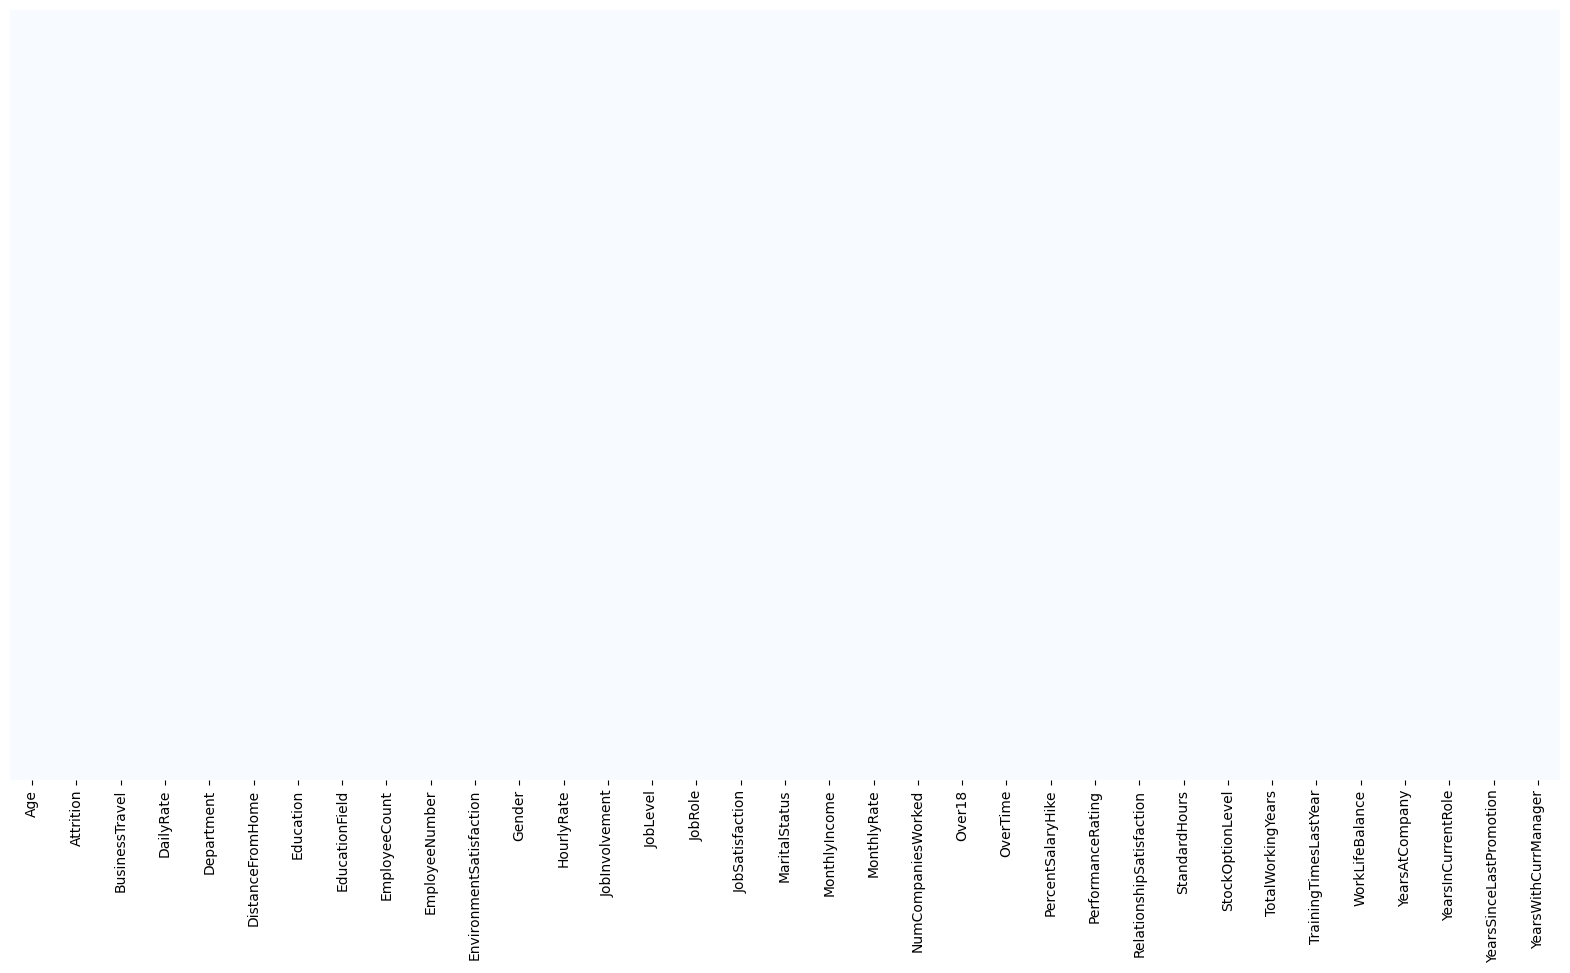

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

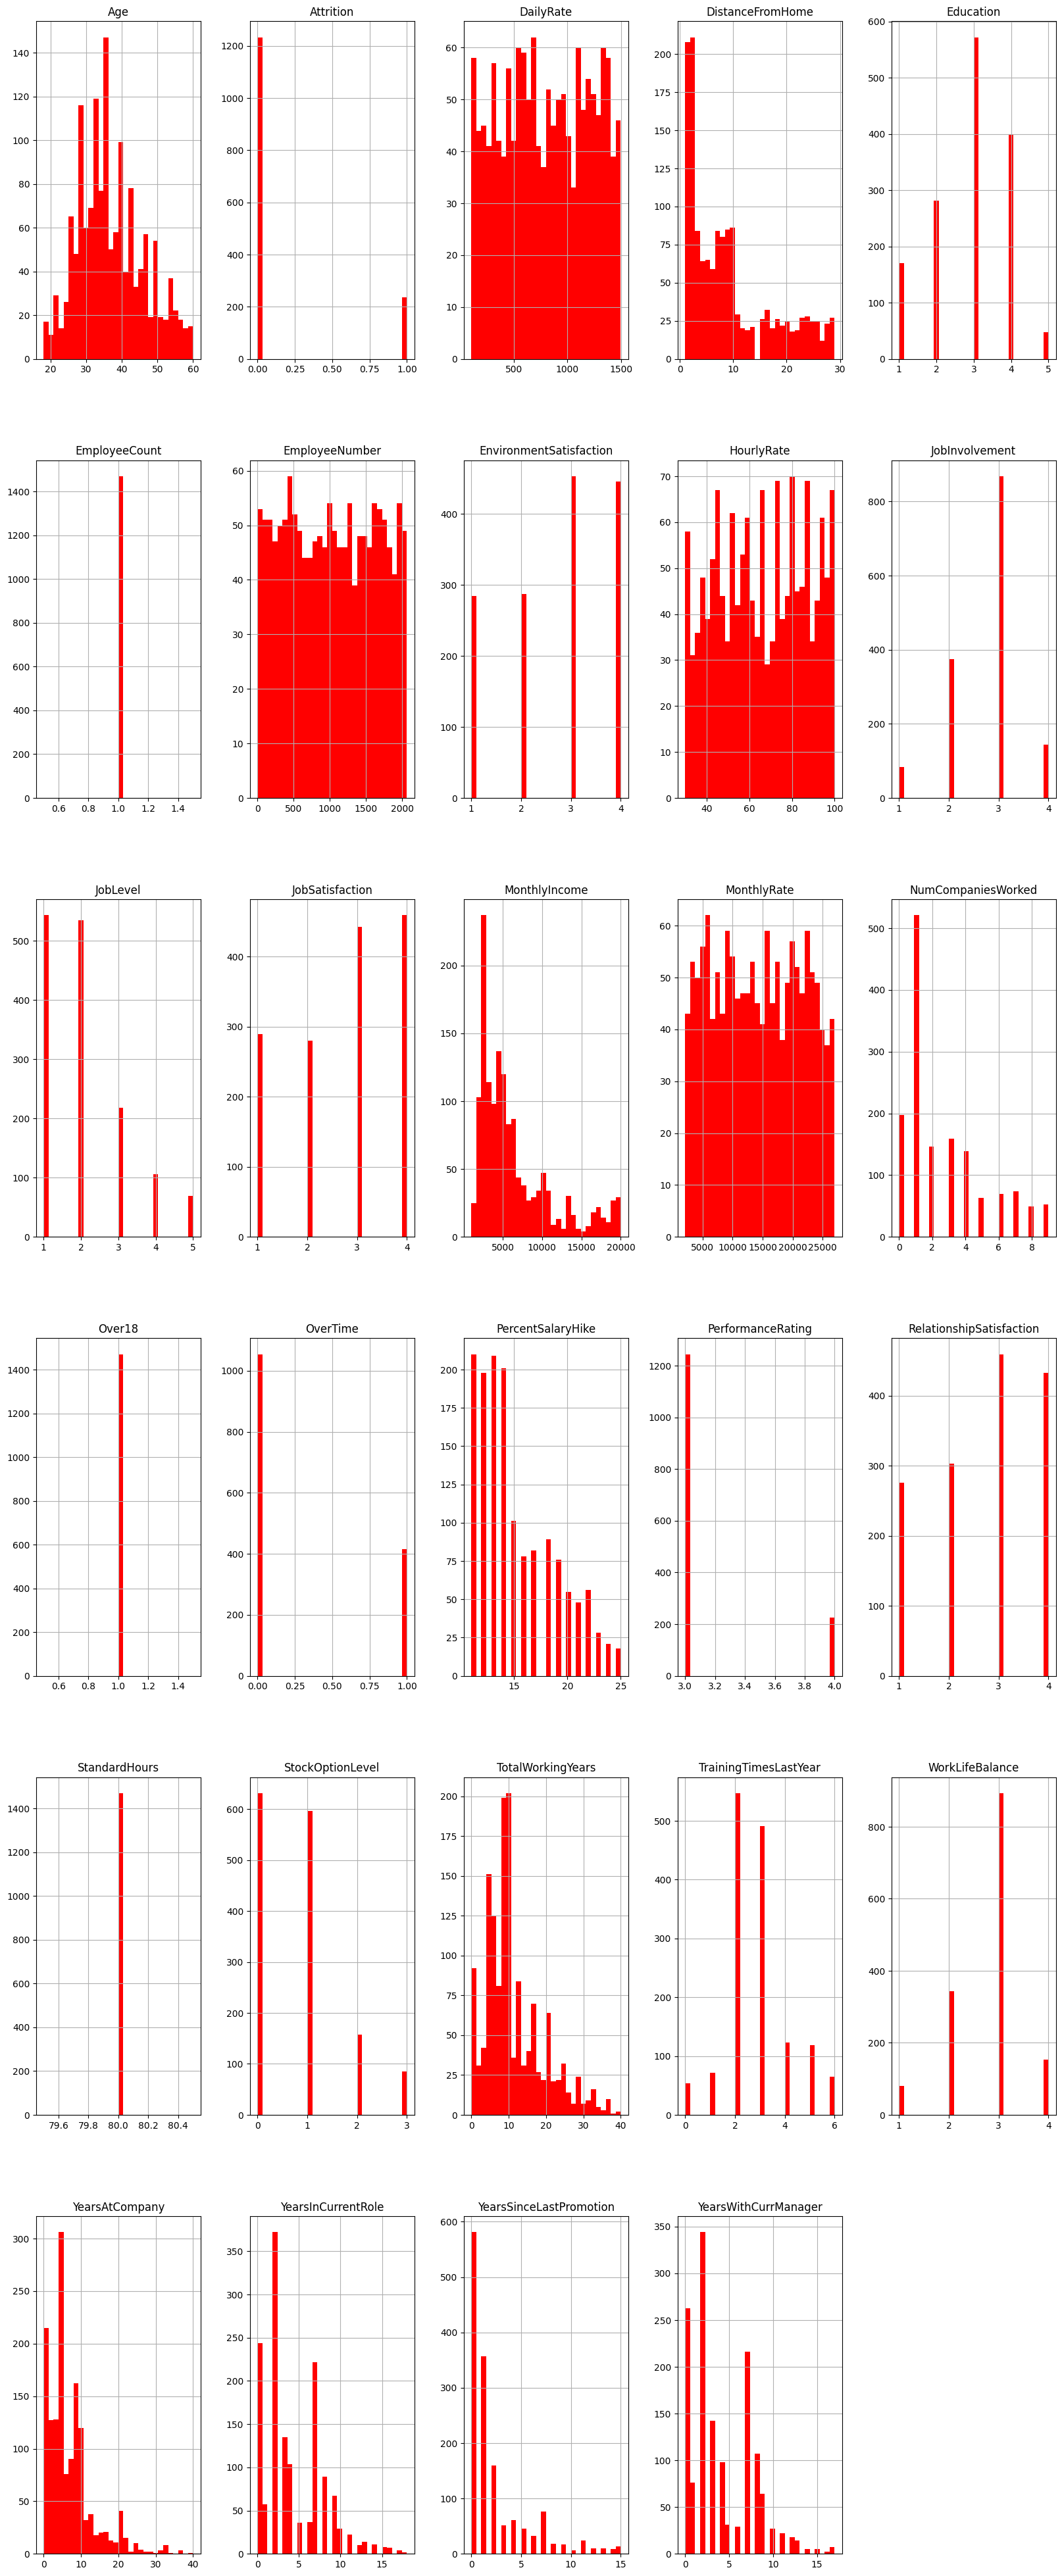

In [15]:
df.hist(bins = 30, figsize = (20,50), color = 'r')
plt.show()

In [16]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)
display (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [17]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [18]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]
display (left_df )
display (stayed_df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [19]:
print("Total =", len(df))
print("Number of employees who left the company =", len(left_df))
print("Percentage of employees who left the company =", 1.*len(left_df)/len(df)*100.0, "%")
print("Number of employees who did not leave the company (stayed) =", len(stayed_df))
print("Percentage of employees who did not leave the company (stayed) =", 1.*len(stayed_df)/len(df)*100.0, "%")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


In [20]:
left_df.describe()
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [23]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                4  ...                  3                         1   
1                2  ...                  4                         4   
2       

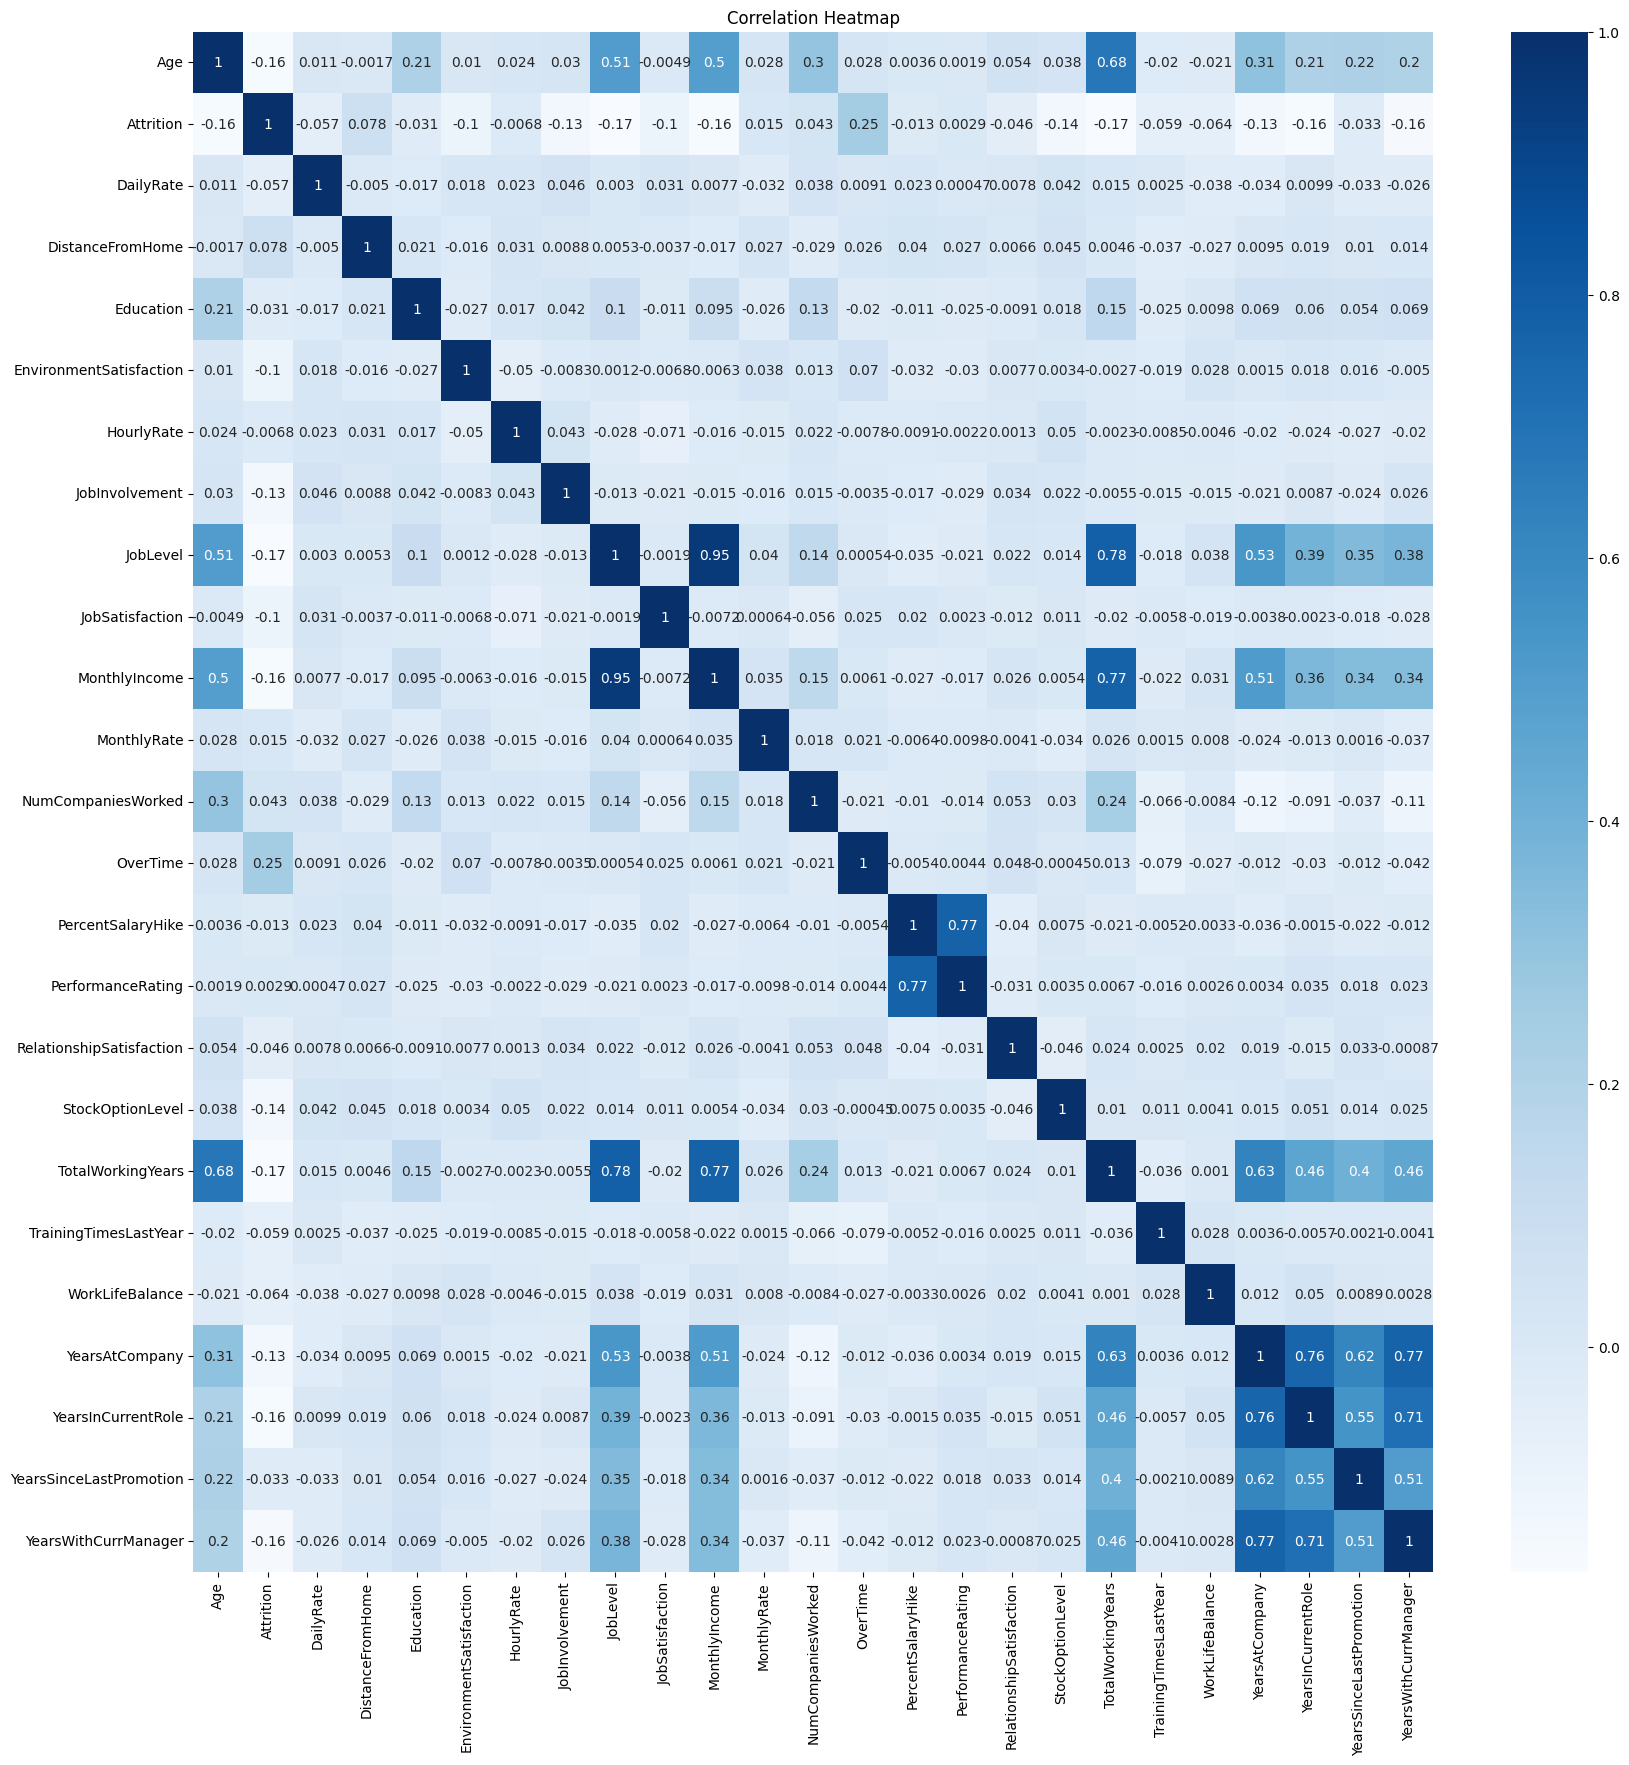

In [24]:
correlations = numeric_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

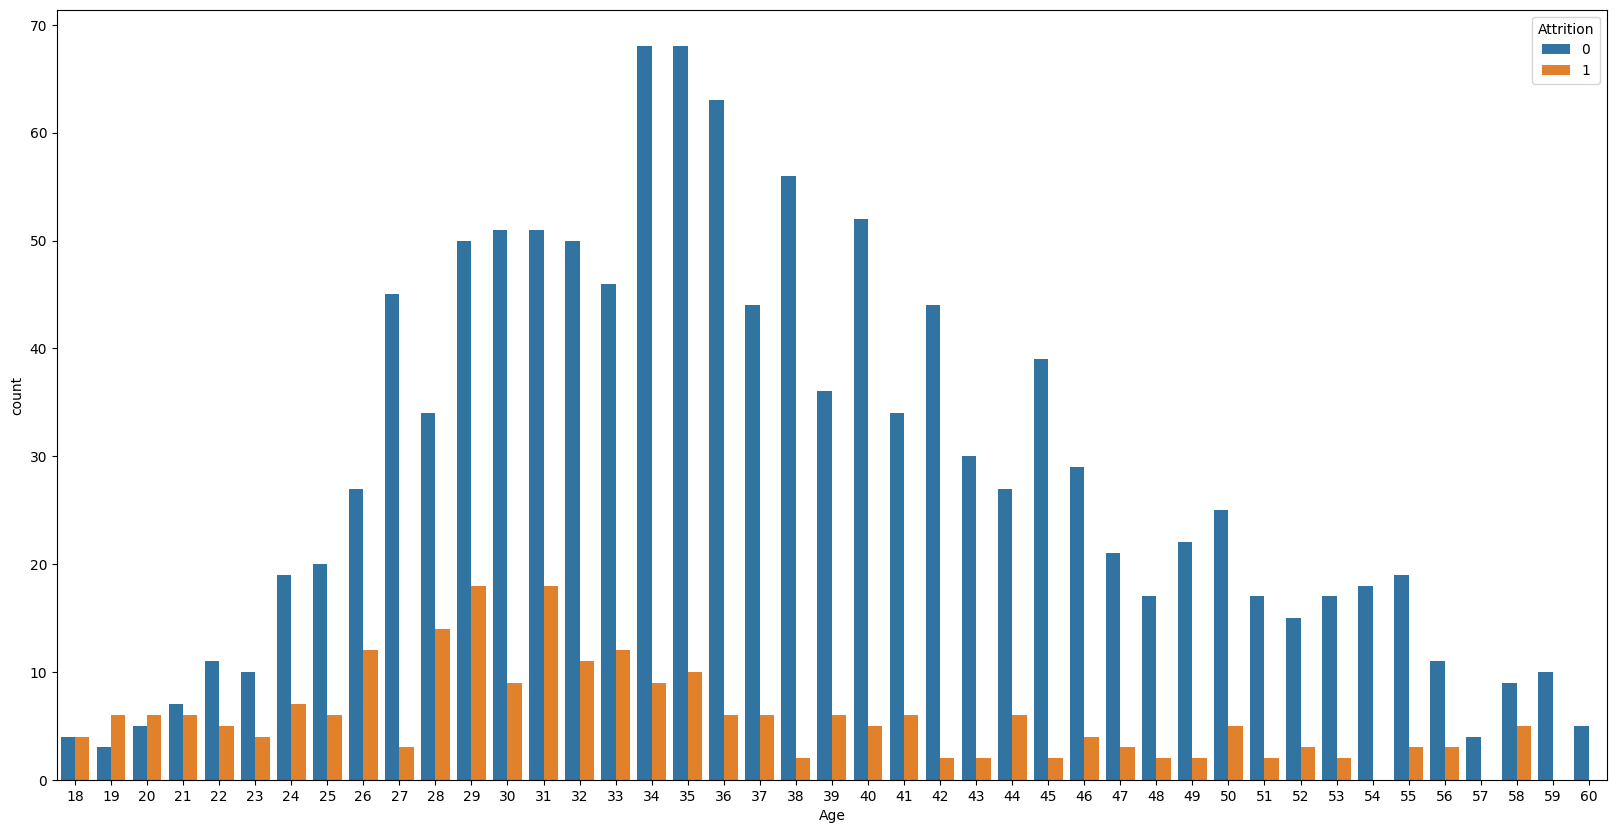

In [26]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.show()

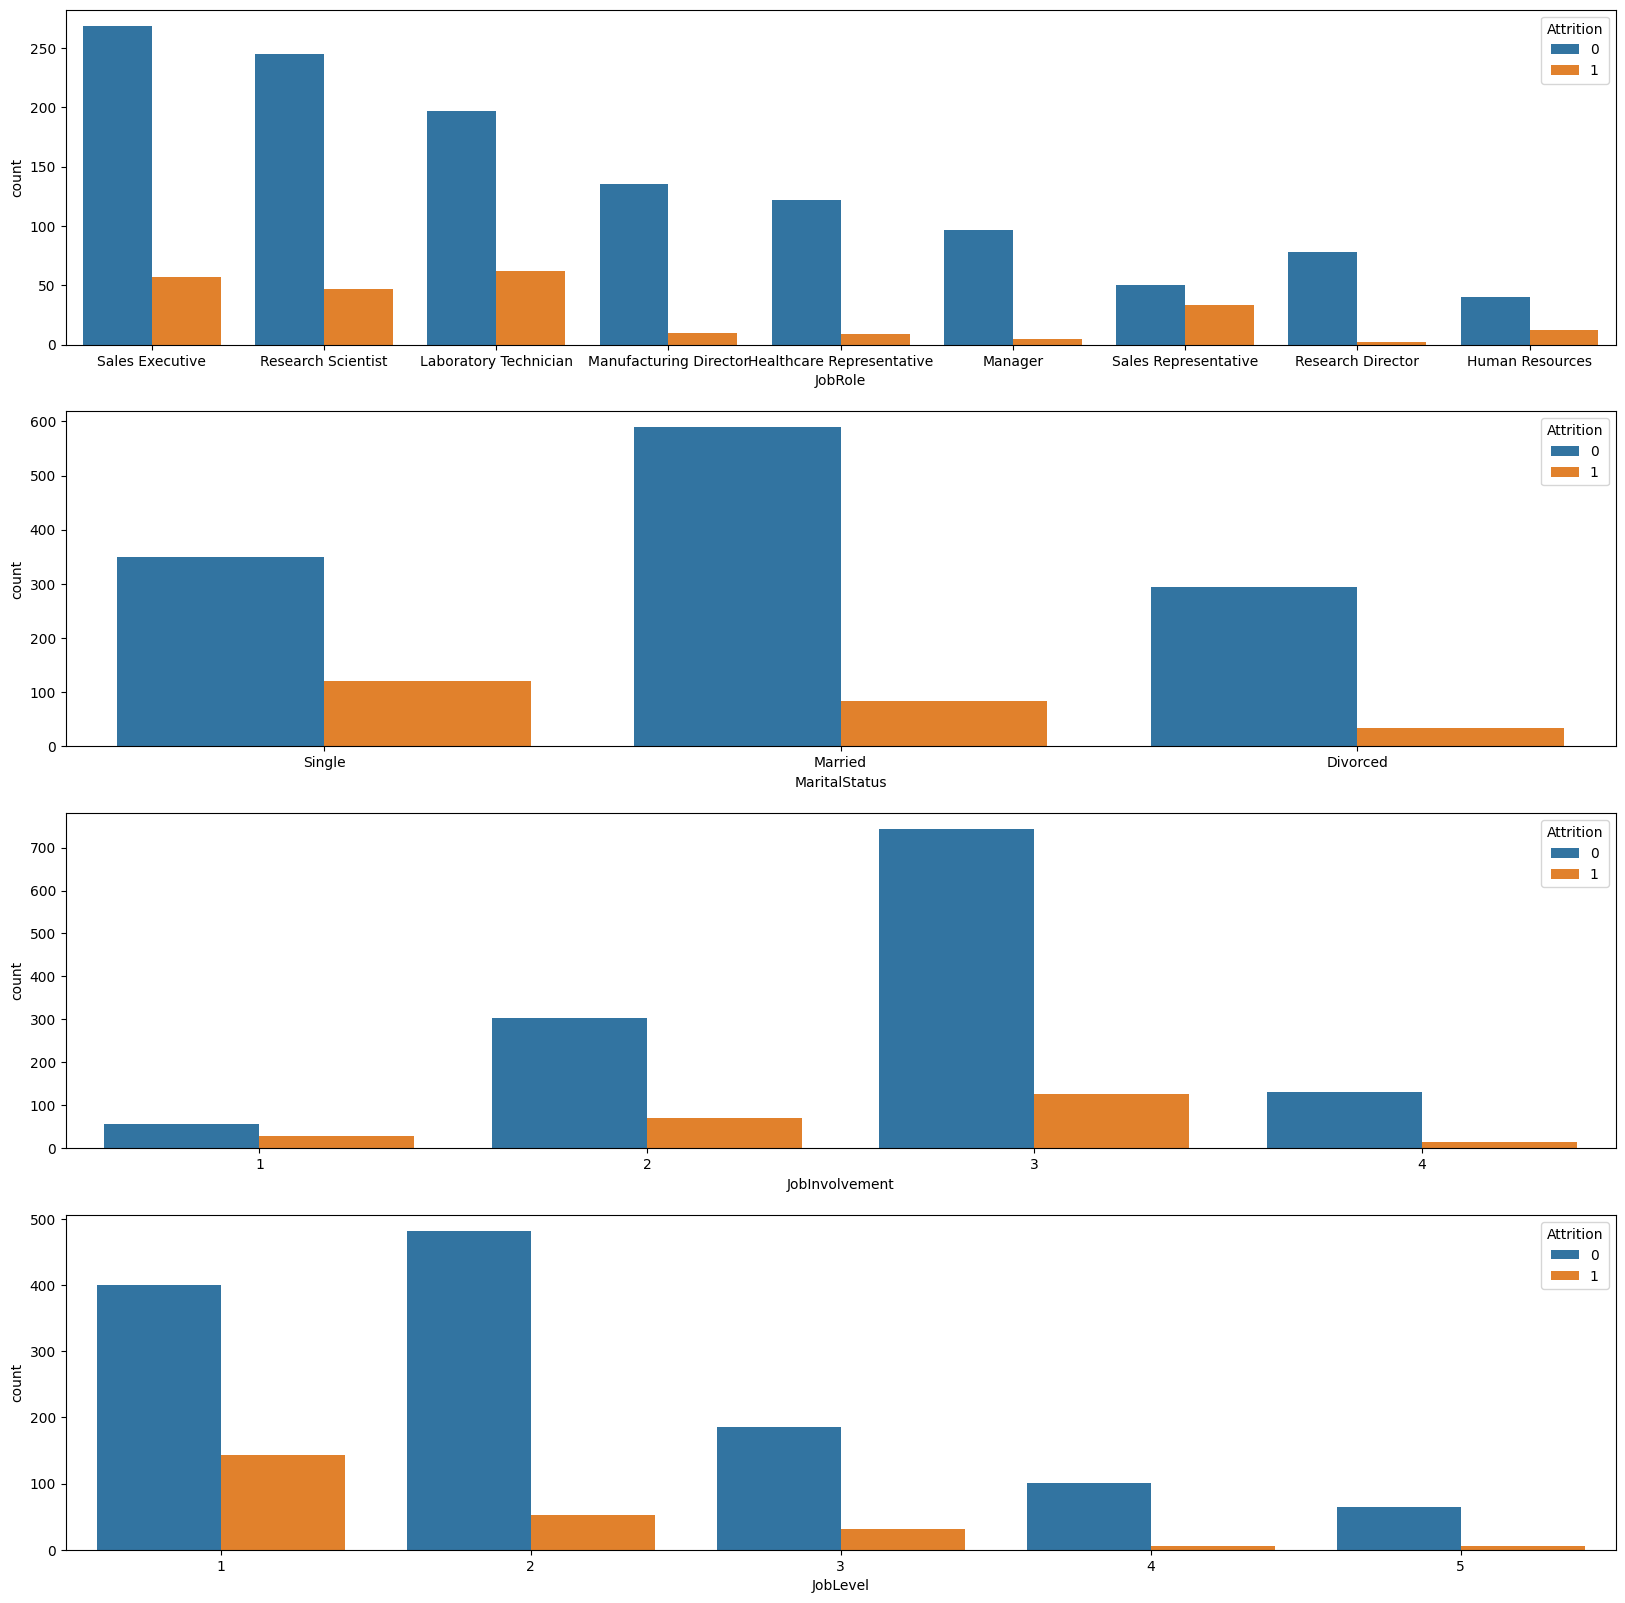

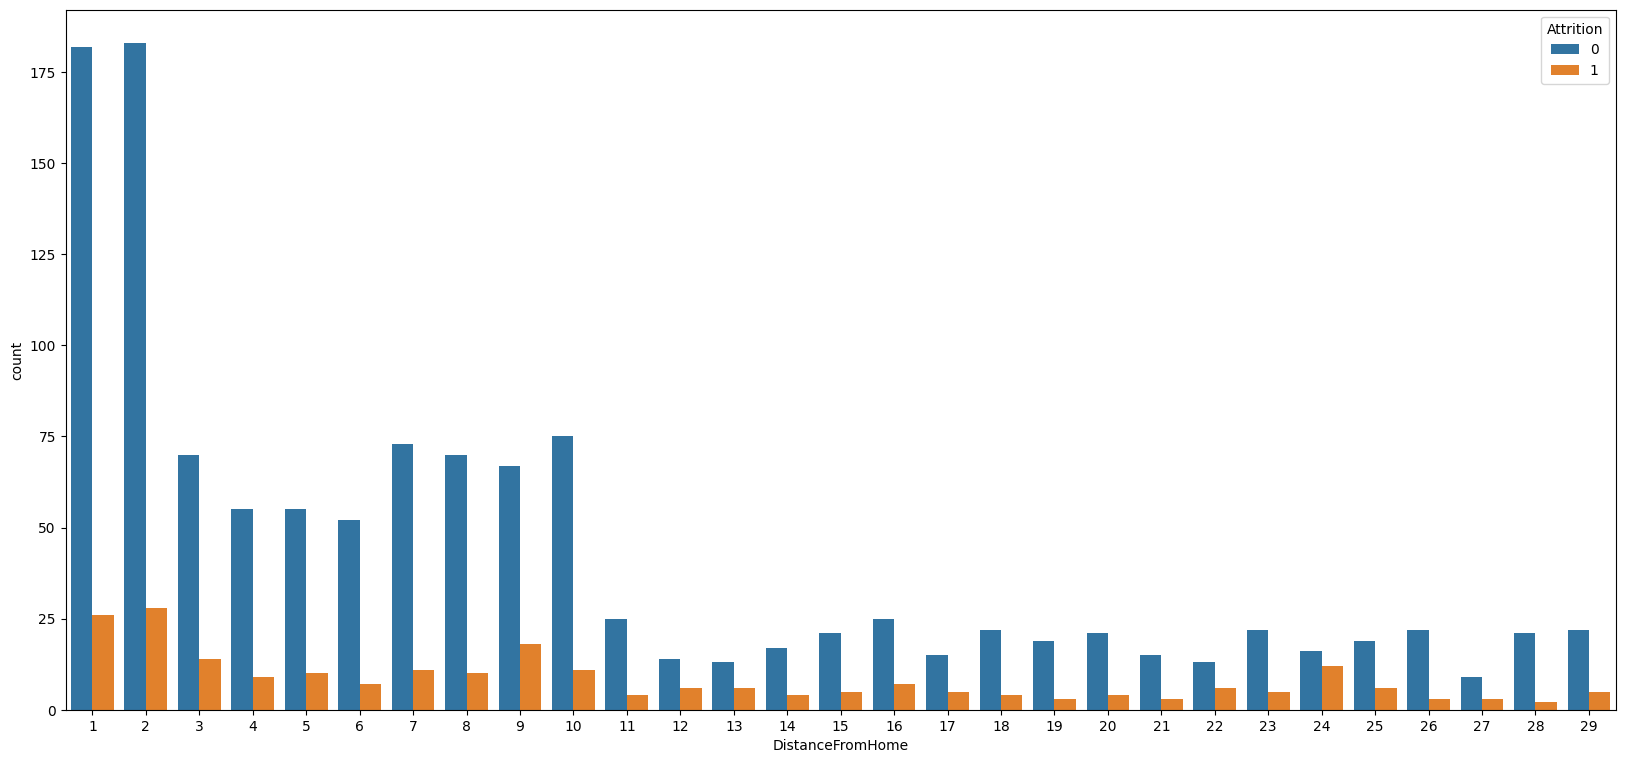

In [27]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)
plt.figure(figsize=[20,20])
plt.subplot(211)
sns.countplot(x = 'DistanceFromHome', hue = 'Attrition', data = df)
plt.show()

Text(0.5, 0, 'Distance From Home')

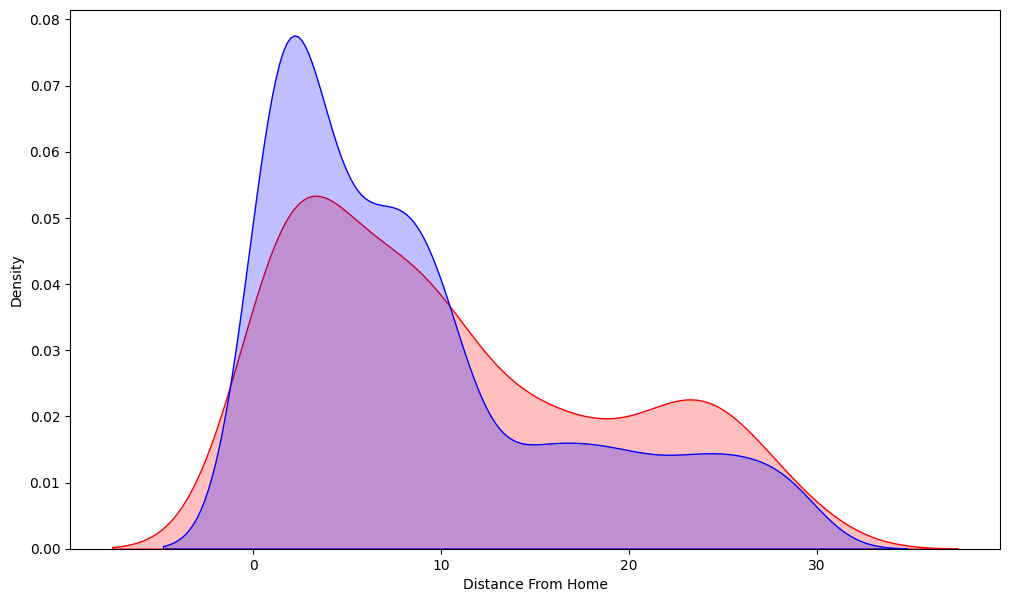

In [28]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Distance From Home')

Text(0.5, 0, 'Years With Current Manager')

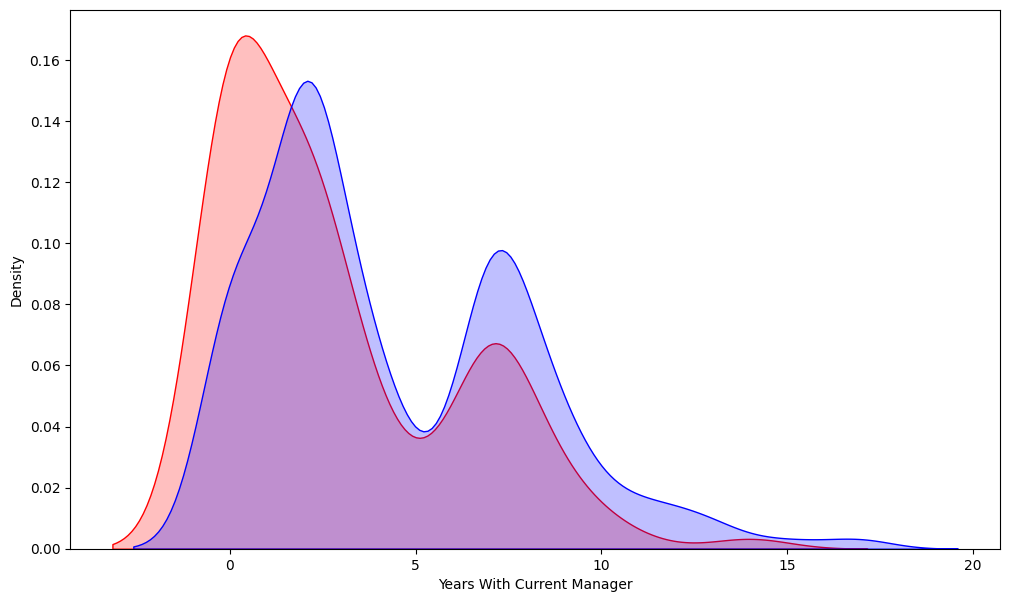

In [29]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

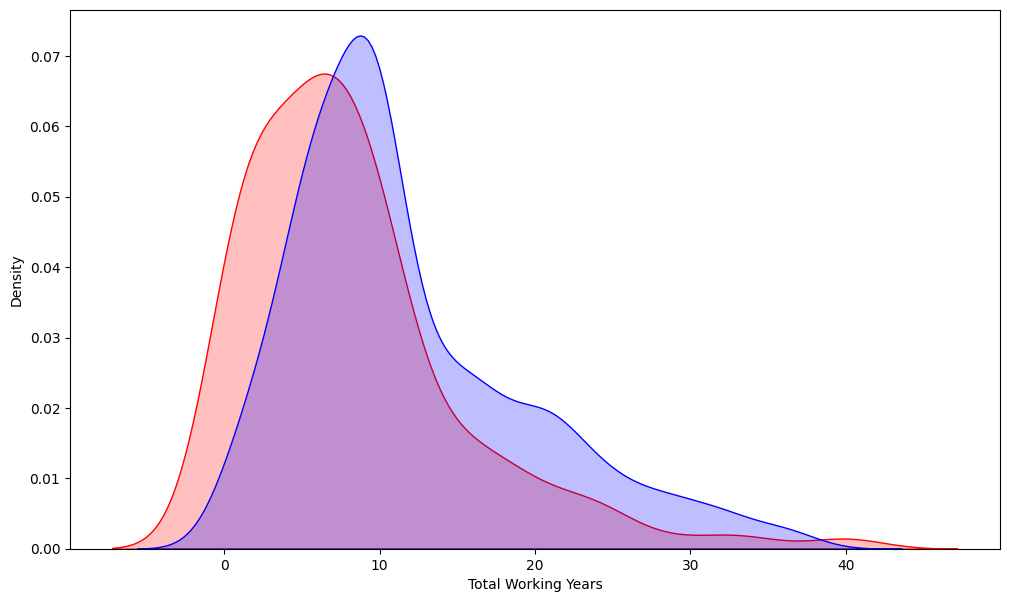

In [30]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')
plt.xlabel('Total Working Years')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

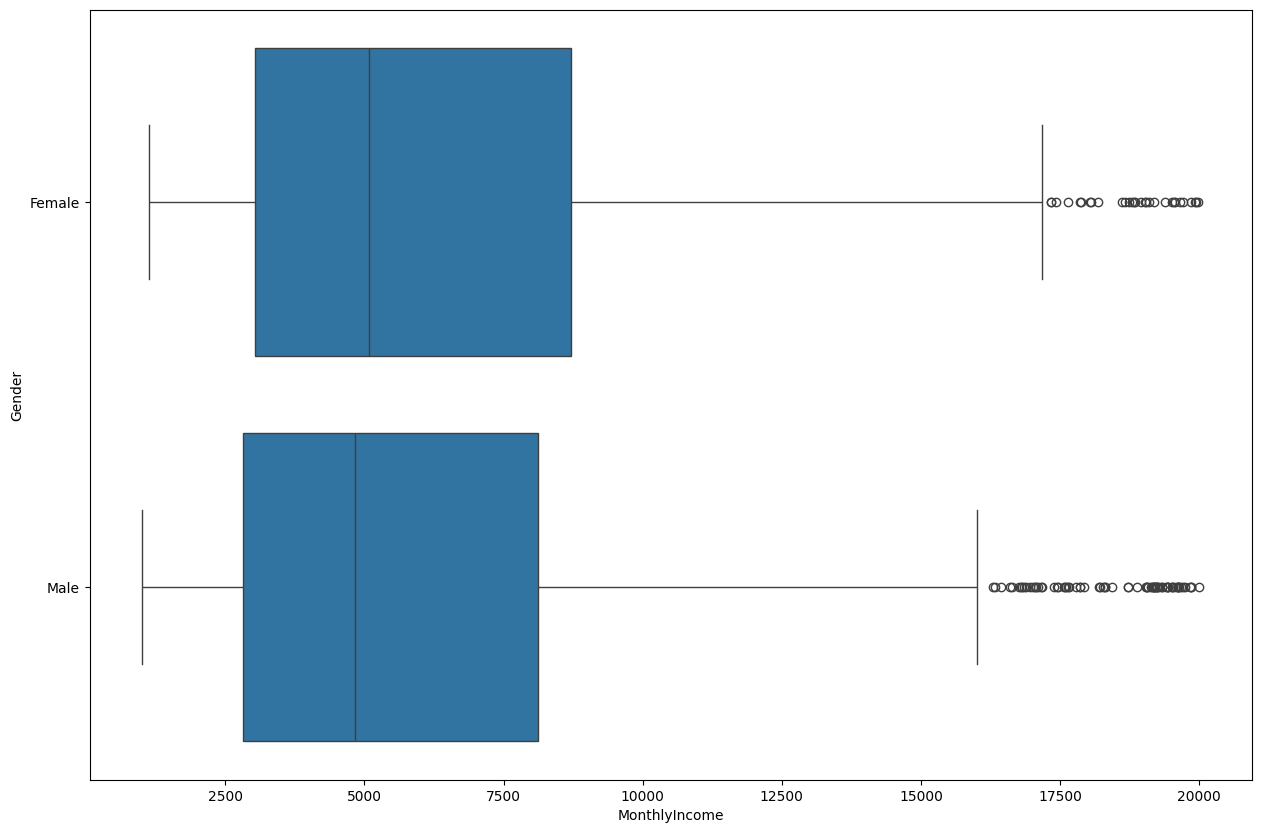

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

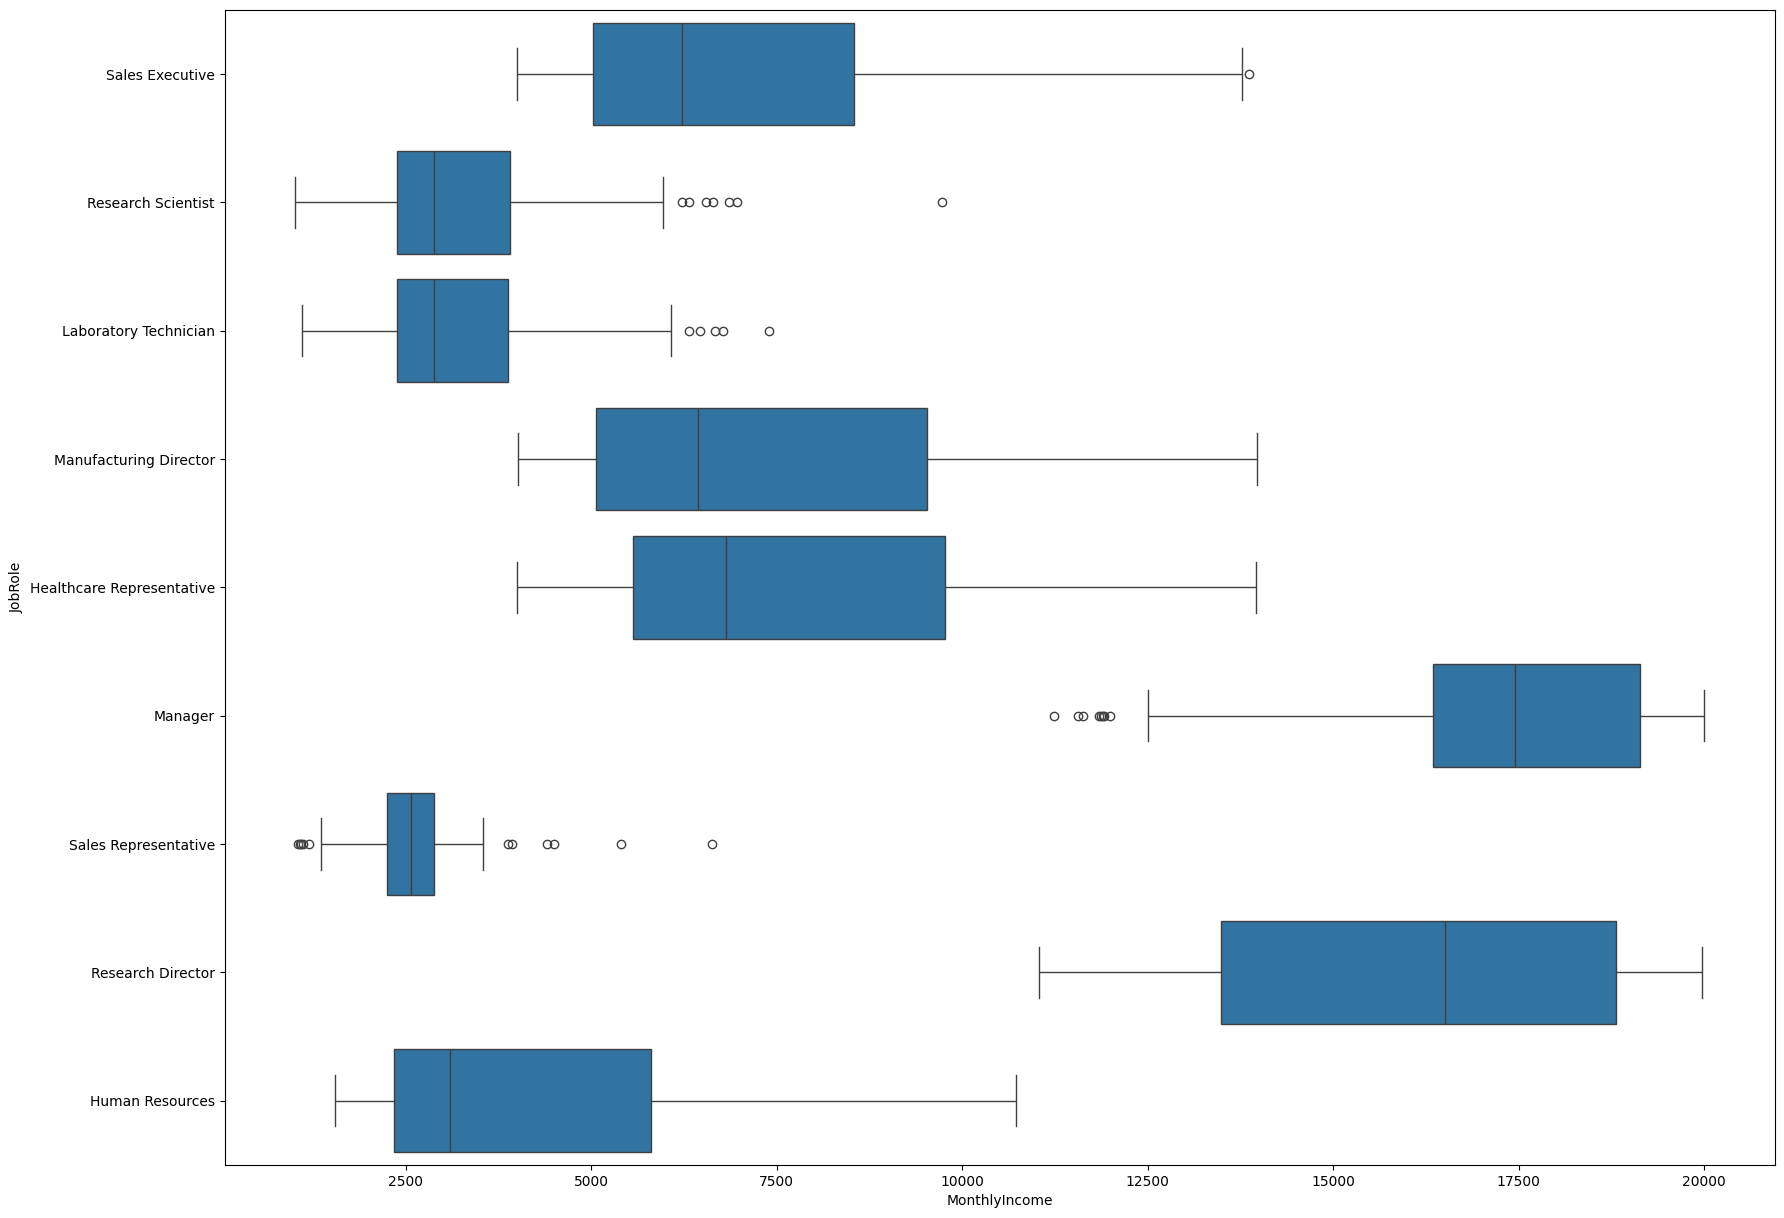

In [34]:
plt.figure(figsize=(20, 15))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [36]:
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
display(X_cat)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [38]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
display(X_cat.shape)
print(X_cat)

(1470, 52)

[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]]


In [39]:
X_cat = pd.DataFrame(X_cat)
display (X_cat)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1466,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1467,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1468,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [40]:
X_numerical = df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
display(X_numerical)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [45]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.columns = X_all.columns.astype(str)

In [48]:
#X.columns = X.columns.astype(str)
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X_scaled_df = pd.DataFrame(X, columns=X_all.columns)
print(X_scaled_df.head())

     0    1    2    3    4    5    6    7    8    9  ...  PerformanceRating  \
0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  ...                0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...                1.0   
2  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...                0.0   
3  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...                0.0   
4  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                  0.000000          0.000000              0.200   
1                  1.000000          0.333333              0.250   
2                  0.333333          0.000000              0.175   
3                  0.666667          0.000000              0.200   
4                  1.000000          0.333333              0.150   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                    0.0         0.

In [49]:
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [50]:
y = df['Attrition']
display (y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
display (X_train.shape)
display (X_test.shape)

(1102, 76)

(368, 76)

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
display (y_pred)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 87.77173913043478 %


In [54]:
cm = confusion_matrix(y_pred, y_test)
print (cm)

[[295  43]
 [  2  28]]


<Axes: >

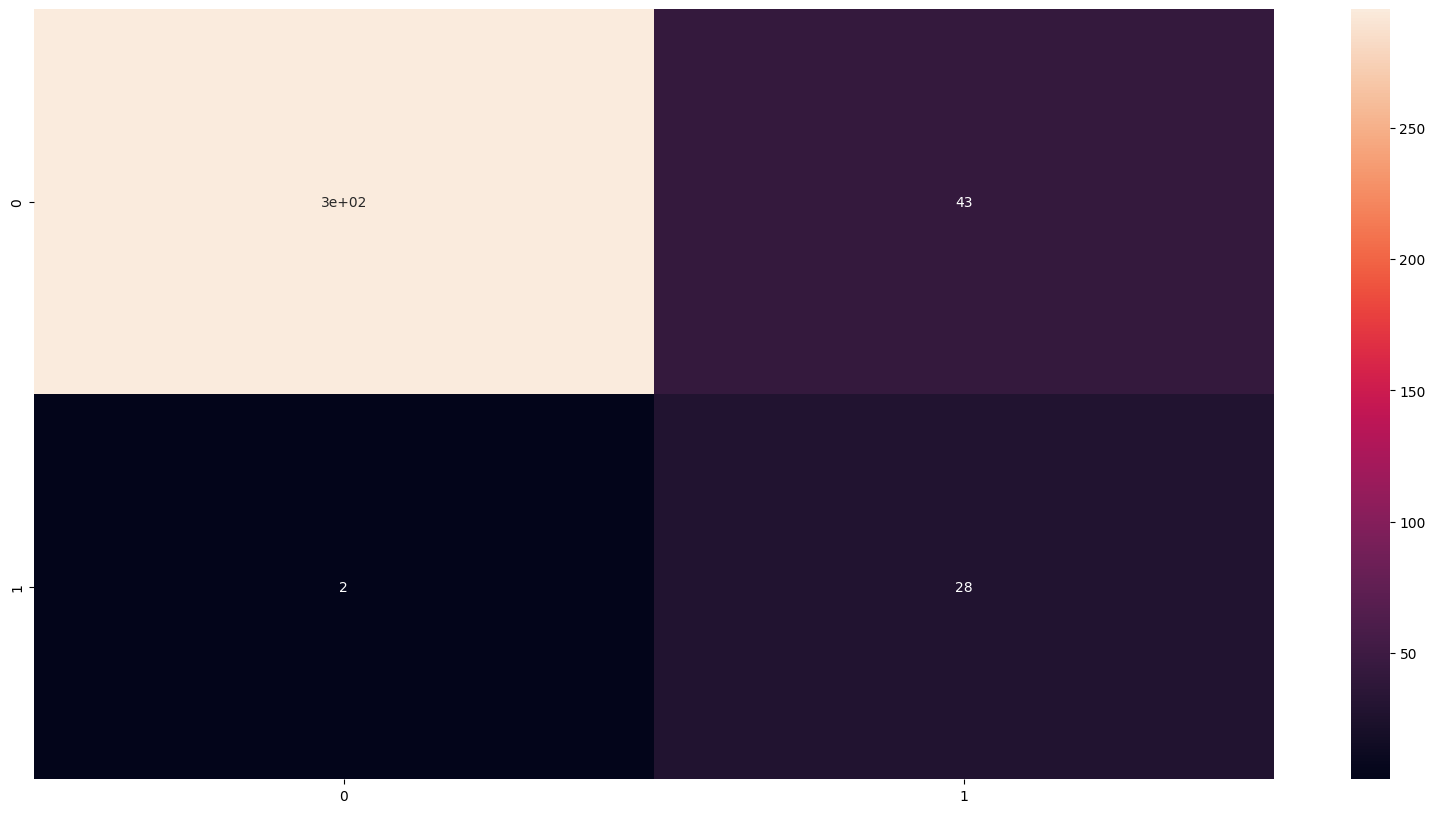

In [55]:
sns.heatmap(cm, annot=True)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       297
           1       0.93      0.39      0.55        71

    accuracy                           0.88       368
   macro avg       0.90      0.69      0.74       368
weighted avg       0.88      0.88      0.86       368



In [57]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display (y_pred)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 82.88043478260869 %


In [60]:
print ('\n Confusion Matrix')
cm = confusion_matrix(y_pred, y_test)
print (cm)


 Confusion Matrix
[[295  61]
 [  2  10]]


<Axes: >

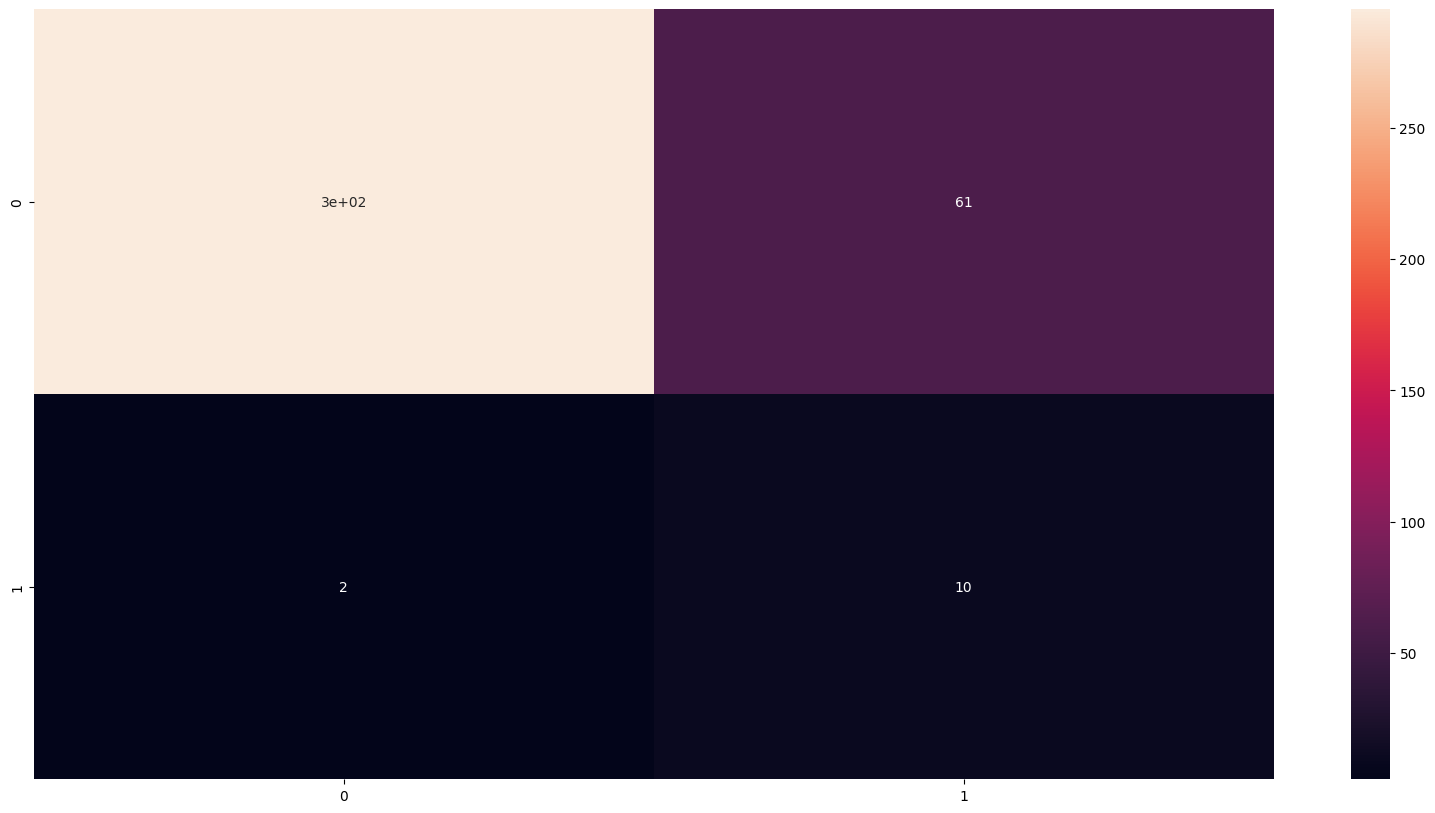

In [61]:
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       297
           1       0.83      0.14      0.24        71

    accuracy                           0.83       368
   macro avg       0.83      0.57      0.57       368
weighted avg       0.83      0.83      0.78       368



In [63]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display (y_pred)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 85.05434782608695 %


In [65]:
print ('\n Confusion Matrix')
cm = confusion_matrix(y_pred, y_test)
print (cm)


 Confusion Matrix
[[289  47]
 [  8  24]]


<Axes: >

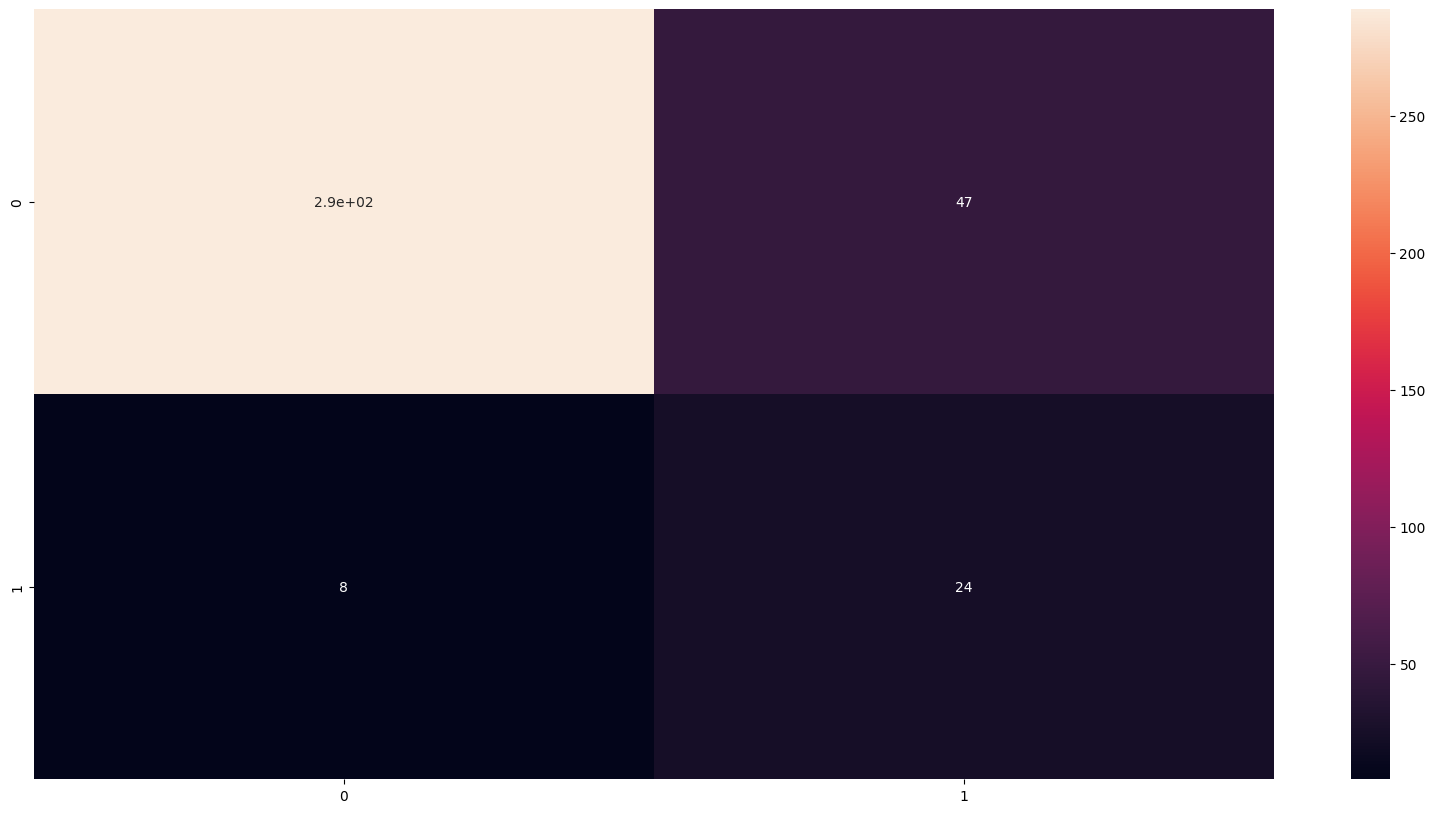

In [66]:
sns.heatmap(cm, annot=True)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       297
           1       0.75      0.34      0.47        71

    accuracy                           0.85       368
   macro avg       0.81      0.66      0.69       368
weighted avg       0.84      0.85      0.83       368



In [77]:
model = Sequential()
model.add(Dense(units=500, activation='relu', input_shape=(76,)))  # Input shape matches your 76 features
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 500)                 │          38,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 540,001 (2.06 MB)

 Trainable params: 540,001 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [79]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8377 - loss: 0.4365
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8684 - loss: 0.3725
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8675 - loss: 0.3387
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8619 - loss: 0.3238
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8925 - loss: 0.2835
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8832 - loss: 0.2751
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8833 - loss: 0.3013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9091 - loss: 0.2486
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9415 - loss: 0.1951
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8974 - loss: 0.2448
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9188 - loss: 0.2005
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

In [81]:
y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5)
display (y_pred)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [82]:
display (epochs_hist.history.keys())

dict_keys(['accuracy', 'loss'])

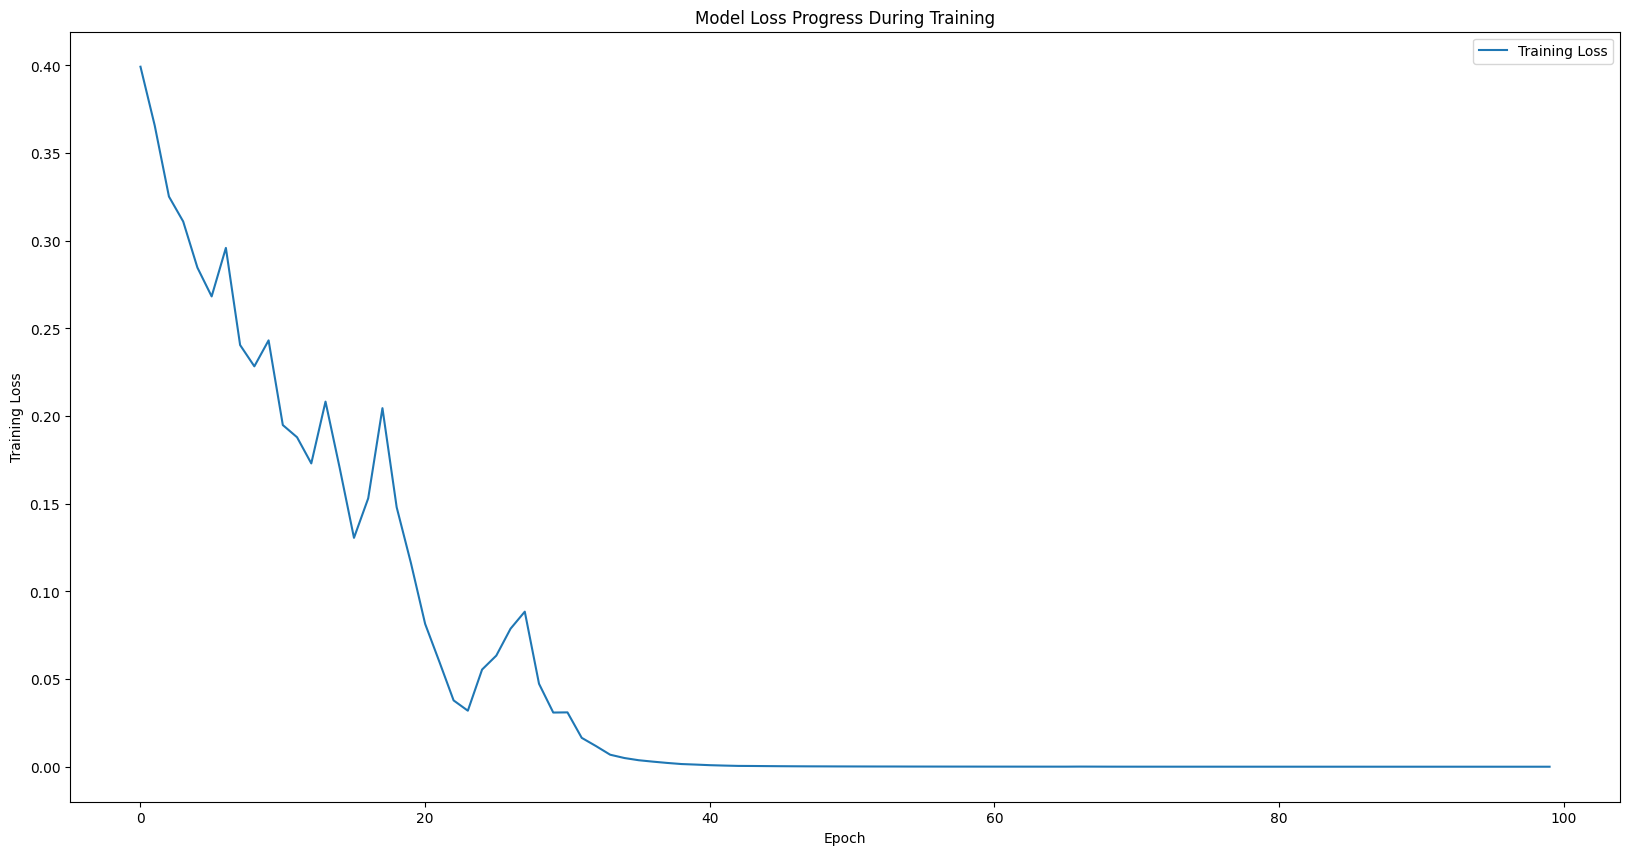

In [83]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

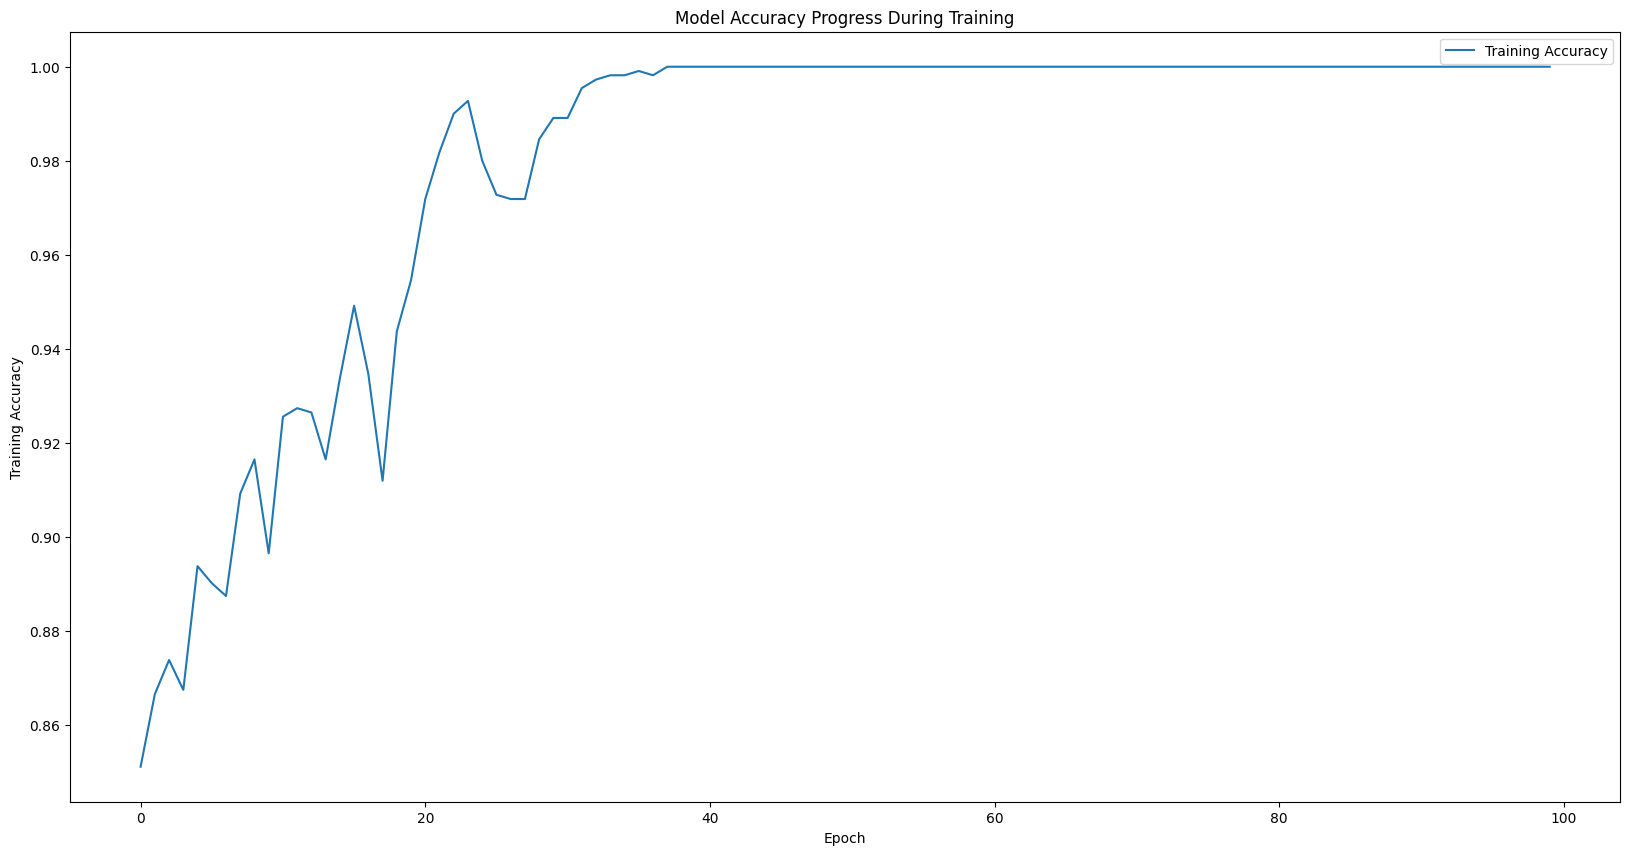

In [84]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

In [86]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[936   0]
 [  0 166]]


<Axes: >

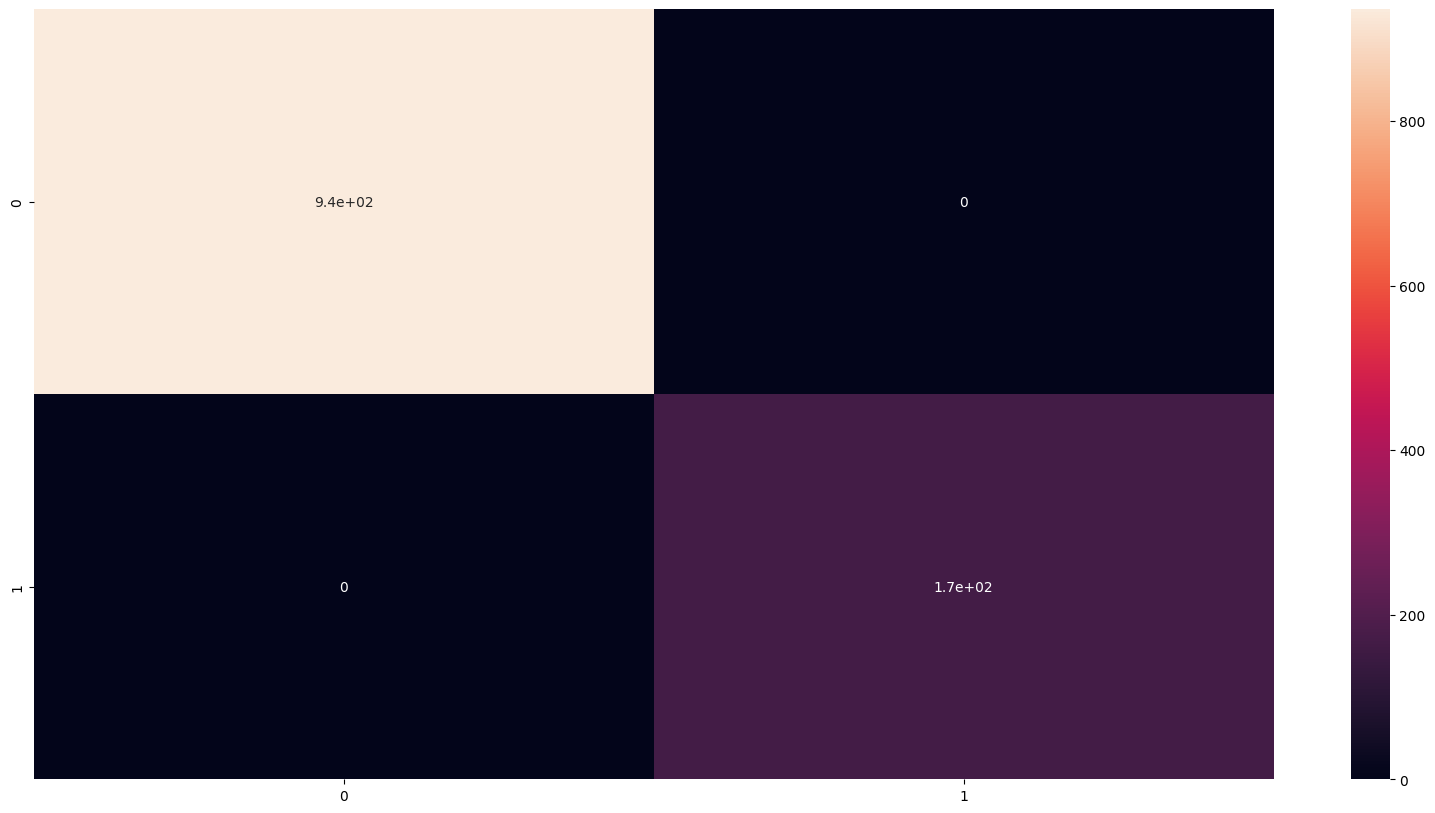

In [87]:
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [89]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
display (y_pred)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [90]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[276  21]
 [ 38  33]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       297
           1       0.61      0.46      0.53        71

    accuracy                           0.84       368
   macro avg       0.75      0.70      0.72       368
weighted avg       0.83      0.84      0.83       368

